# Chapter 8: Dimensionality Reduction #

Two main broad approaches: Projection (ie. PCA), and Manifold Learning (ie. LLE)

In [3]:
# import libraries
import pandas as pd
import numpy as np

# to make this notebook's output stable across runs
np.random.seed(42)

import matplotlib
import matplotlib.pyplot as plt

# set options for rendering plots
%matplotlib inline

# display multiple outputs within a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all";

# Principal Component Analysis

High dimensional data often lies close to a lower dimensional *subspace* - a lower dimensional vector space, closed under addition/multiplication (think of a 2D hyperplane in 3D) <br>
<br>
**TWO STEPS OF PCA**: 
1. Identifies the hyperplane that lies closest to the data
2. Projects the data onto it

Linear vs. non-linear dimensionality reduction: think 2D hyperplane vs. 2D manifold in 3 dimensions (swiss roll vs. hyperplane)

It seems reasonable to select the axis that preserves the maximum amount of variance,
as it will most likely lose less information than the other projections. Another
way to justify this choice is that it is the axis that minimizes the mean squared distance
between the original dataset and its projection onto that axis.

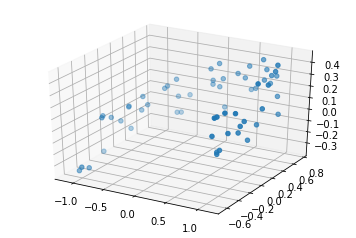

In [5]:
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits import mplot3d
m = 60
w1, w2 = 0.1, 0.3
noise = 0.1

angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
X = np.empty((m, 3))
X[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m) / 2
X[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
X[:, 2] = X[:, 0] * w1 + X[:, 1] * w2 + noise * np.random.randn(m)

ax = plt.axes(projection='3d')
ax.scatter3D(X[:, 0], X[:, 1], X[:, 2]);    

Sklearn's PCA takes care of centering around the mean, need to do this manually if using another implementation like below

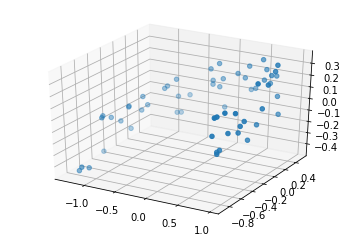

In [6]:
# center around the mean for each coordinate
%matplotlib inline
X_centered = X - X.mean(axis=0)
bx = plt.axes(projection='3d')
bx.scatter3D(X_centered[:, 0], X_centered[:, 1], X_centered[:, 2]); 

In [7]:
# first two principal components
# x - x(bar) - covariance/variance?
X_centered = X - X.mean(axis=0)
# singular value decomposition
# V contains eigenvectors
U, s, V = np.linalg.svd(X_centered)
c1 = V.T[:, 0]
c2 = V.T[:, 1]
c1
c2
V.T
X_centered[1:10];

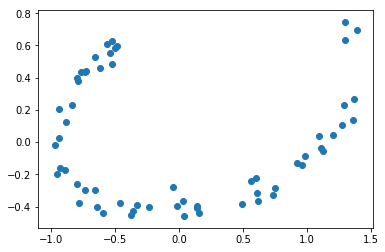

In [8]:
# project training set onto plane defined by the first two principal components
# c1, c2 are the x,y axes on the 2-d graph, high observed variance in both directions
W2 = V.T[:, :2]
# matrix multiplication
X_centered.shape
W2.shape
X2D = X_centered.dot(W2)
X2D.shape

%matplotlib inline
plt.scatter(X2D[:, 0], X2D[:, 1]);

In [9]:
# PCA in scikit-learn
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X2D = pca.fit_transform(X)
# first two principal components
pca.components_.T[:,0]
pca.components_.T[:,1]
print(pca.explained_variance_ratio_)

array([-0.97925714, -0.14119124, -0.14532888])

array([ 0.17759   , -0.94340211, -0.28009685])

[0.80811694 0.17866794]


In [11]:
pca = PCA()
pca.fit(X)
# explained variance after adding additional components
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1
cumsum
# set explained variance ratio cutoff
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

array([0.80811694, 0.98678488, 1.        ])

## Kernel PCA

same trick can be applied to PCA, making it possible to perform
complex nonlinear projections for dimensionality reduction.

In [86]:
from sklearn.decomposition import KernelPCA
rbf_pca = KernelPCA(n_components = 2, kernel="rbf", gamma=0.04)
X_reduced = rbf_pca.fit_transform(X)

## more pca, geometry, eigenvectors, etc.

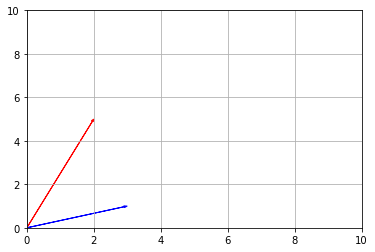

In [12]:
# function to plot 2-D vectors
u = np.array([2, 5])
v = np.array([3, 1])
def plot_vector2d(vector2d, origin, **options):
    return plt.arrow(origin[0], origin[1], vector2d[0], vector2d[1],
              head_width=0.08, head_length=0.1, length_includes_head=True,
              **options)
plot_vector2d(u, origin = [0,0], color="r")
plot_vector2d(v, origin = [0,0], color="b")
plt.axis([0, 10, 0, 10])
plt.grid()
plt.show();

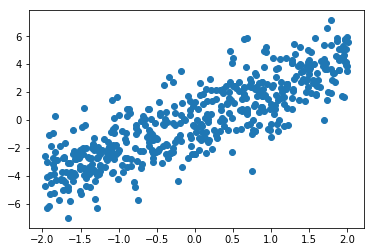

In [13]:
# plot data
X = np.zeros((500, 2))
for i in range(500):
    x = np.random.uniform(-2, 2)
    y = 2*x + 1.5*np.random.randn()
    X[i,0] = x
    X[i,1] = y
X = X - X.mean(axis=0)
plt.scatter(X[:, 0], X[:, 1])

[0.96456348 0.03543652]


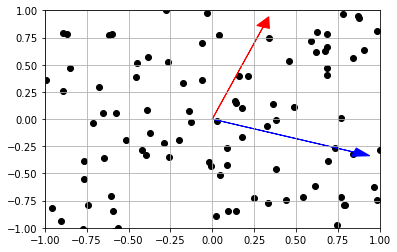

In [14]:
pca = PCA(n_components = 2)
X2D = pca.fit_transform(X)
# first two principal components
pca.components_.T[:,0]
pca.components_.T[:,1]
print(pca.explained_variance_ratio_)

plot_vector2d(pca.components_.T[:,0], origin = [0,0], color="r")
plot_vector2d(pca.components_.T[:,1], origin = [0,0], color="b")
plt.axis([-1, 1, -1, 1])
plt.grid()
plt.scatter(X[:, 0], X[:, 1], c = "black")
plt.show();

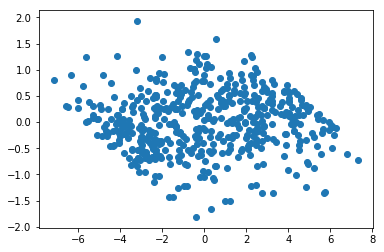

In [15]:
# project the data onto the plane defined by the principal component axes
plt.scatter(X2D[:, 0], X2D[:, 1]);

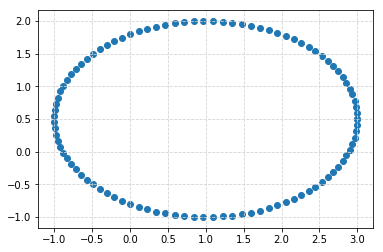

In [16]:
# plot ellipse
from math import pi

u=1.     #x-position of the center
v=0.5    #y-position of the center
a=2.     #radius on the x-axis
b=1.5    #radius on the y-axis

t = np.linspace(0, 2*pi, 100)
x = u+a*np.cos(t)
y = v+b*np.sin(t)
X = np.array((x,y)).T
plt.scatter(x, y)
plt.grid(color='lightgray',linestyle='--')
plt.show();

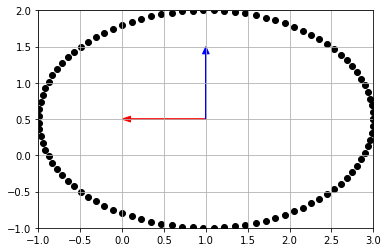

In [17]:
pca = PCA(n_components = 2)
X2D = pca.fit_transform(X)
# first two principal components
c1 = pca.components_.T[:,0]
c2 = pca.components_.T[:,1]

plot_vector2d(c1, origin = [u,v], color="r")
plot_vector2d(c2, origin = [u,v], color="b")
plt.axis([-1, 3, -1, 2])
plt.grid()
plt.scatter(X[:, 0], X[:, 1], c = "black")
plt.show();

# Manifold Learning

Nonlinear dimensionality reduction, in PCA we have linear component axes but we can consider projecting to non-linear axes

d dimensional manifold in n-dimensional space (d < n) locally resembles a d-dimensional hyperplane

Manifold Learning: <br>
- In theory, the curse of dimensionality sends high dimensional data exponentially farther away from each other
- In reality, Manifold hypothesis/assumption: real high dimensional datasets - many features are not uniformly spread out, features are constant, correlated, etc. so datasets lie close to a lower dimensional manifold
- Example: mnist digits - the digits all share some structure like solid white lines. Much much more degrees of freedom if you pick random pixel values/images. This shows the mnist data is constant or has little variance along many dimensions
- Manifold assumption - assume the classification/regression task is easier when modeling data as a lower dimensional manifold (easier decision boundaries, etc.)

__Manifold Learning Methods__

- **Local Linear Embedding (LLE)** Local linear Embedding seeks a lower-dimensional projection of the data which preserves distances within local neighborhoods. It can be thought of as a series of local Principal Component Analyses which are globally compared to find the best non-linear embedding.

- **Multidimensional Scaling (MDS)** reduces dimensionality while trying to preserve
the distances between the instances

- **Isomap** (Isometric mapping) creates a graph by connecting each instance to its nearest neighbors, then
reduces dimensionality while trying to preserve the geodesic distances9 between
the instances.

- **t-Distributed Stochastic Neighbor Embedding (t-SNE)** reduces dimensionality
while trying to keep similar instances close and dissimilar instances apart. It is
mostly used for visualization, in particular to visualize clusters of instances in
high-dimensional space (e.g., to visualize the MNIST images in 2D).


__Other Dimensionality Reduction Methods__

- **Linear Discriminant Analysis (LDA)** is actually a classification algorithm, but during
training it learns the most discriminative axes between the classes, and these
axes can then be used to define a hyperplane onto which to project the data. The
benefit is that the projection will keep classes as far apart as possible, so LDA is a
good technique to reduce dimensionality before running another classification
algorithm such as an SVM classifier.

## Locally Linear Embedding

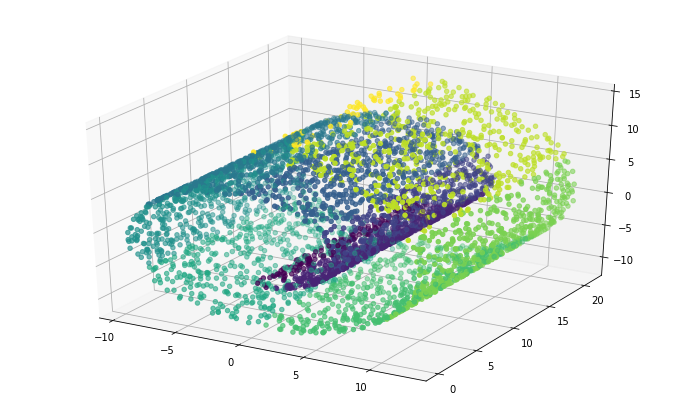

In [18]:
from sklearn.datasets.samples_generator import make_swiss_roll
X, color = make_swiss_roll(n_samples = 5000)
color = color.astype(np.int)
%matplotlib inline
fig = plt.figure(figsize = (12, 16))
ax = fig.add_subplot(211, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color)

array([12, 11, 11, ...,  4,  6, 13])

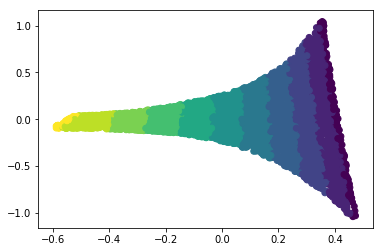

In [19]:
from sklearn.manifold import LocallyLinearEmbedding
lle = LocallyLinearEmbedding(n_components = 2, n_neighbors = 10)
X_reduced = lle.fit_transform(X)
X_reduced = X_reduced*20
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=color)
color

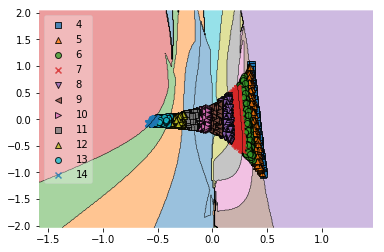

In [20]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

X = X_reduced
y = color
y = y.astype(np.int)

rbf_clf = Pipeline((
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="poly"))
))
rbf_clf = rbf_clf.fit(X, y)

from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X, y, clf=rbf_clf, legend=2);

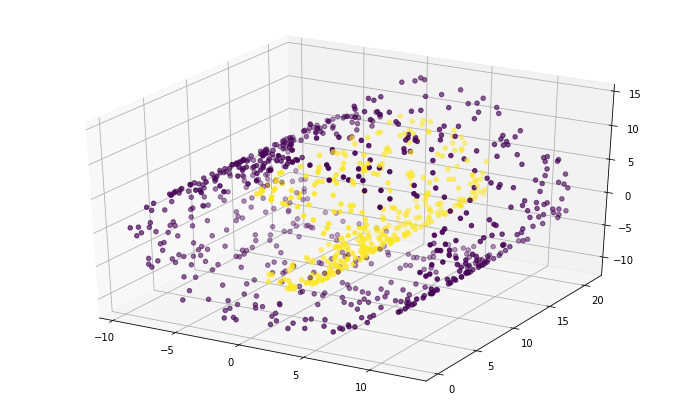

In [21]:
from sklearn.datasets.samples_generator import make_swiss_roll
X, color = make_swiss_roll(n_samples = 1000)
color[color < 8] = 1
color[(color > 8)] = 0
%matplotlib inline
fig = plt.figure(figsize = (12, 16))
ax = fig.add_subplot(211, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color)

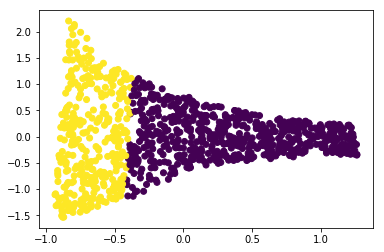

In [22]:
from sklearn.manifold import LocallyLinearEmbedding
lle = LocallyLinearEmbedding(n_components = 2, n_neighbors = 10)
X_reduced = lle.fit_transform(X)
X_reduced = X_reduced*20
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=color);

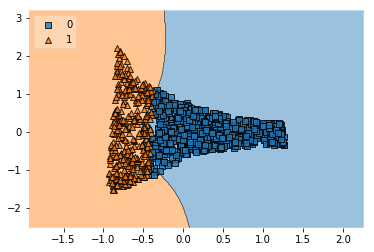

In [23]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

X = X_reduced
y = color
y = y.astype(np.int)

rbf_clf = Pipeline((
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="poly"))
))
rbf_clf = rbf_clf.fit(X, y)

from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X, y, clf=rbf_clf, legend=2);

## mnist digits

In [24]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')

In [25]:
X = mnist['data']
y = mnist['target']
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]
mnist.data.shape

(70000, 784)

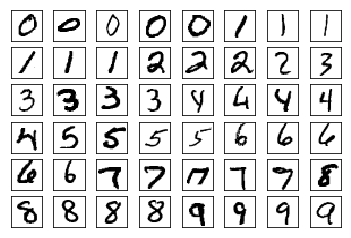

In [26]:
fig, ax = plt.subplots(6, 8, subplot_kw=dict(xticks=[], yticks=[]))
for i, axi in enumerate(ax.flat):
    axi.imshow(mnist.data[1250 * i].reshape(28, 28), cmap='gray_r');

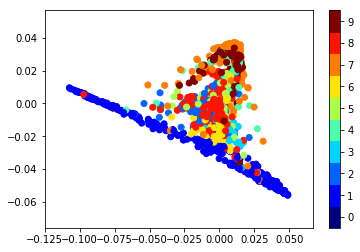

In [29]:
from sklearn.manifold import LocallyLinearEmbedding

data = mnist.data[::30]
target = mnist.target[::30]

model = LocallyLinearEmbedding(n_components = 2, n_neighbors = 10)
proj = model.fit_transform(data)
plt.scatter(proj[:, 0], proj[:, 1], c=target, cmap=plt.cm.get_cmap('jet', 10))
plt.colorbar(ticks=range(10))
plt.clim(-0.5, 9.5);

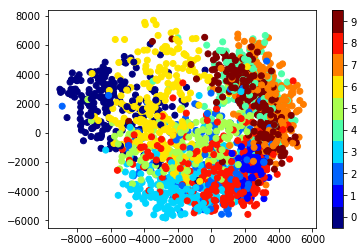

In [30]:
# use only 1/30 of the data: full dataset takes a long time!
from sklearn.manifold import Isomap

data = mnist.data[::30]
target = mnist.target[::30]

model = Isomap(n_components=2, n_neighbors=5)
proj = model.fit_transform(data)
plt.scatter(proj[:, 0], proj[:, 1], c=target, cmap=plt.cm.get_cmap('jet', 10))
plt.colorbar(ticks=range(10))
plt.clim(-0.5, 9.5);

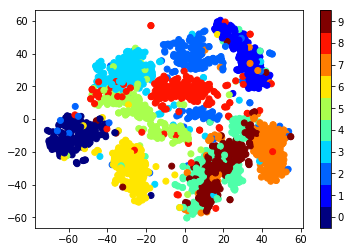

In [31]:
from sklearn.manifold import TSNE

data = mnist.data[::30]
target = mnist.target[::30]

model = TSNE(n_components=2)
proj = model.fit_transform(data)
plt.scatter(proj[:, 0], proj[:, 1], c=target, cmap=plt.cm.get_cmap('jet', 10))
plt.colorbar(ticks=range(10))
plt.clim(-0.5, 9.5);

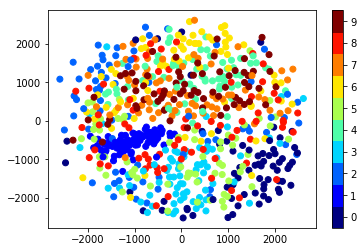

In [170]:
from sklearn.manifold import MDS

data = mnist.data[::100]
target = mnist.target[::100]

model = MDS(n_components=2)
proj = model.fit_transform(data)
plt.scatter(proj[:, 0], proj[:, 1], c=target, cmap=plt.cm.get_cmap('jet', 10))
plt.colorbar(ticks=range(10))
plt.clim(-0.5, 9.5);

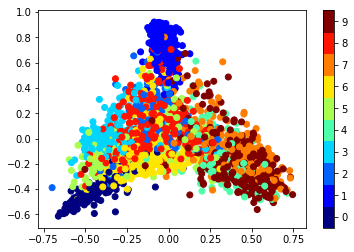

In [130]:
from sklearn.manifold import SpectralEmbedding

data = mnist.data[::30]
target = mnist.target[::30]

model = SpectralEmbedding(n_components=2)
proj = model.fit_transform(data)
plt.scatter(proj[:, 0], proj[:, 1], c=target, cmap=plt.cm.get_cmap('jet', 10))
plt.colorbar(ticks=range(10))
plt.clim(-0.5, 9.5);

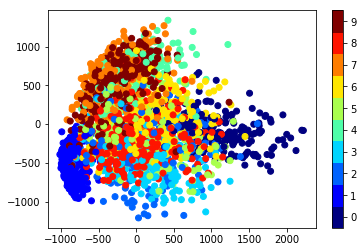

In [140]:
# PCA
data = mnist.data[::30]
target = mnist.target[::30]

model = PCA(n_components=2)
proj = model.fit_transform(data)
plt.scatter(proj[:, 0], proj[:, 1], c=target, cmap=plt.cm.get_cmap('jet', 10))
plt.colorbar(ticks=range(10))
plt.clim(-0.5, 9.5);

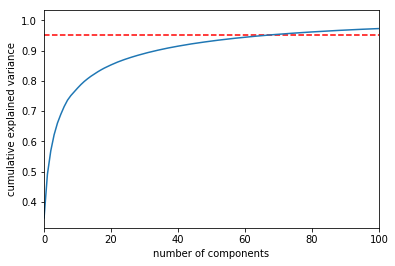

In [166]:
# explained variance from principal components
model = PCA()
proj = model.fit_transform(data)
model.components_[:3]
cumsum = np.cumsum(model.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1
plt.plot((0, 800), (0.95, 0.95), 'r--')
plt.plot(cumsum)
plt.xlim(0,100)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

The original data is 28 x 28 = 784 dimensions, but with only the first 67 principal components we can preserve 95% of the variance. This confirms the fact that the intrinsic dimensionality of the mnist data is much lower and there's a lot of common structure shared between any handwritten digits compared to randomly generated images. 

In [187]:
data[1];

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

### plot images of digits

In [145]:
from matplotlib import offsetbox

def plot_components(data, model, images=None, ax=None,
                    thumb_frac=0.05, cmap='gray'):
    ax = ax or plt.gca()
    
    proj = model.fit_transform(data)
    ax.plot(proj[:, 0], proj[:, 1], '.k')
    
    if images is not None:
        min_dist_2 = (thumb_frac * max(proj.max(0) - proj.min(0))) ** 2
        shown_images = np.array([2 * proj.max(0)])
        for i in range(data.shape[0]):
            dist = np.sum((proj[i] - shown_images) ** 2, 1)
            if np.min(dist) < min_dist_2:
                # don't show points that are too close
                continue
            shown_images = np.vstack([shown_images, proj[i]])
            imagebox = offsetbox.AnnotationBbox(
                offsetbox.OffsetImage(images[i], cmap=cmap),
                                      proj[i])
            ax.add_artist(imagebox)

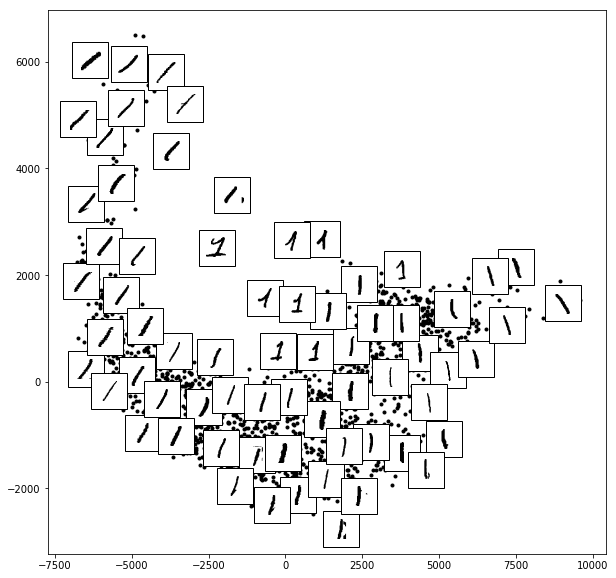

In [158]:
# Choose 1/4 of the "1" digits to project
data = mnist.data[mnist.target == 1][::4]

fig, ax = plt.subplots(figsize=(10, 10))
model = Isomap(n_neighbors=5, n_components=2, eigen_solver='dense')
plot_components(data, model, images=data.reshape((-1, 28, 28)),
                ax=ax, thumb_frac=0.05, cmap='gray_r')

We see that as you move to the right, the digits get less slanted and more straight. As you move up, the 1's have the "hat" at the top of the digit. These are the first two principal component axes that preserve the most existing variance of the data.

In [1]:
# Choose 1/4 of the "4" digits to project
data = mnist.data[mnist.target == 4][::4]

fig, ax = plt.subplots(figsize=(10, 10))
model = Isomap(n_neighbors=5, n_components=2, eigen_solver='dense')
plot_components(data, model, images=data.reshape((-1, 28, 28)),
                ax=ax, thumb_frac=0.05, cmap='gray_r')

NameError: name 'mnist' is not defined

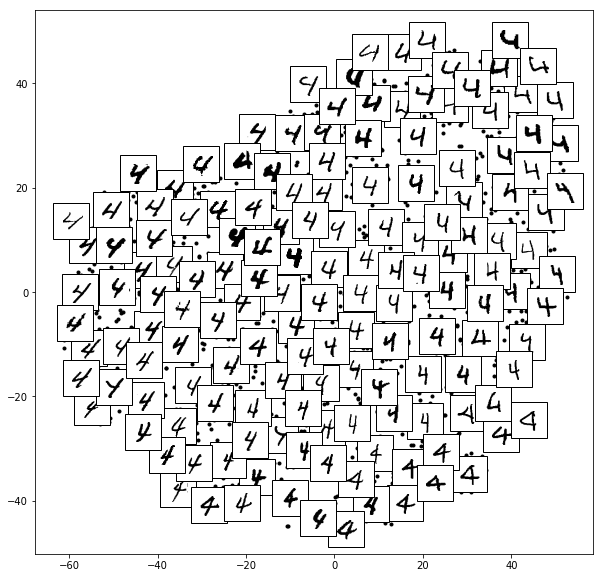

In [148]:
# Choose 1/4 of the "1" digits to project
data = mnist.data[mnist.target == 4][::4]

fig, ax = plt.subplots(figsize=(10, 10))
model = TSNE(n_components=2)
plot_components(data, model, images=data.reshape((-1, 28, 28)),
                ax=ax, thumb_frac=0.05, cmap='gray_r')

t-SNE seems to do slightly better at visualizing higher dimensional data in lower dimensions, as it does better preserving separation between different higher dimensional instances/classes in lower dimensions. Moving from left to right, the digits get less slanted. Moving from the bottom to the top, the 4's are written slightly differently.

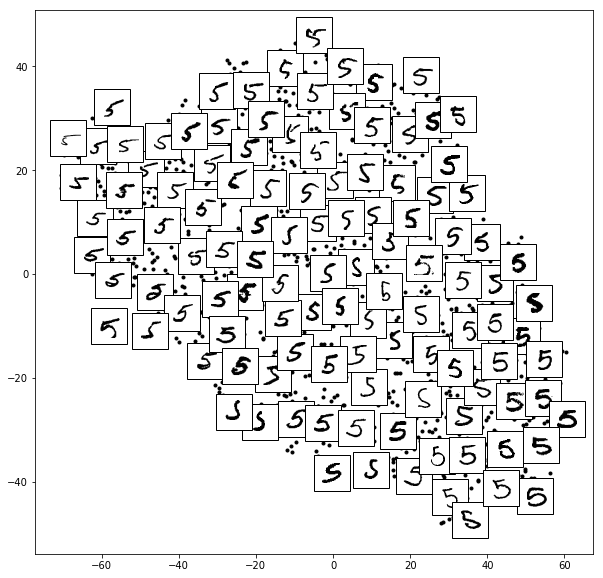

In [172]:
# Choose 1/4 of the "1" digits to project
data = mnist.data[mnist.target == 5][::4]

fig, ax = plt.subplots(figsize=(10, 10))
model = TSNE(n_components=2)
plot_components(data, model, images=data.reshape((-1, 28, 28)),
                ax=ax, thumb_frac=0.05, cmap='gray_r')